<a href="https://colab.research.google.com/github/amunoz88/Applied_DS_2025/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics as skm
import sklearn.compose as skc
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
from scipy import stats

0      3
1      5
2      5
3      4
4      4
      ..
995    4
996    5
997    4
998    2
999    1
Name: X, Length: 1000, dtype: int64


NameError: name 'np' is not defined

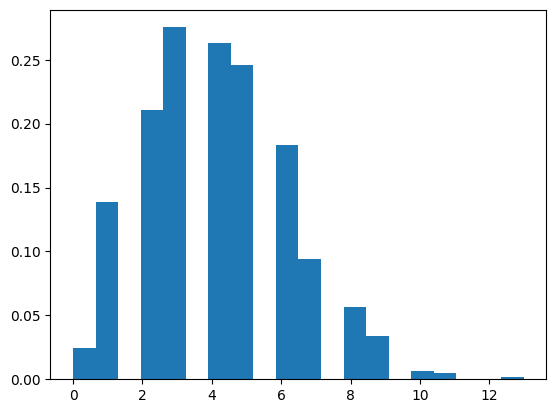

In [2]:
data = pd.read_csv("/content/drive/MyDrive/CUNY 2025/Datasets/poisson.csv")
print(data.X)
plt.hist(data.X, bins=20, density=True)
theta = np.mean(data.X)
print(theta)
probs = stats.poisson(theta).pmf(range(0,11))
plt.plot(range(0,11), probs)

Visit https://www.kaggle.com/datasets/wenruliu/adult-income-dataset download the dataset and upload it to Colab


In [23]:
import numpy as np
# Replace with the correct path.
data = pd.read_csv("/content/adult.csv")
data['label'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
data = data.drop('income', axis=1)
#print(data)

#Replace column names
columns=data.columns
columns = [c.replace("-", "_") for c in columns]
data.columns = columns

NUMERICAL = ['fnlwgt','educational_num', 'capital_gain', 'capital_loss','age', 'hours_per_week']
CATEGORICAL = list(set(data.columns) - set(NUMERICAL))
CATEGORICAL.remove('label')

# Transform data in columns to have mean zero and standard deviation 1. This
# seems to help a bit with the numerical instability issues. In class we did
# MinMax Scaler but this seems to work better.
column_transformer = skc.ColumnTransformer(
    [('std', skp.StandardScaler(), NUMERICAL)],
    remainder='passthrough',
    verbose_feature_names_out=False
)


data = pd.DataFrame(column_transformer.fit_transform(data), columns=column_transformer.get_feature_names_out())
features = []

print(np.mean(data.capital_loss))
#Create formula
data = data.drop('workclass', axis=1)

for c in data.columns:
  if c == 'label':
    continue
  features.append(c)

  model_string =  'label~' + "+".join(features)

# Transformer makes columns into objects. We remap them to floats.
for c  in NUMERICAL:
  data[c] = data[c].astype(float)
data.label = data.label.astype(int)

# LBFGS is an optimization method that usually works well.
# Number of iterations is the number of iterations for the optimization method.
print(smf.logit(model_string,data).fit(maxiter=500, method='lbfgs').summary())



7.617581999352657e-17
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48750
Method:                           MLE   Df Model:                           91
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.4220
Time:                        14:16:53   Log-Likelihood:                -15534.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -4.8131   7.02e+05  -6.86e-06      1.000   -1.38e+06    1.38e+06
educati

In [ ]:

features = []
train_accuracy = []
test_accuracy = []
for i,c in enumerate(train.columns):
  if c == 'label':
    continue
  features.append(c)
  print(features)

  model_string =  'label~' + "+".join(features)
  print(model_string)
  model = smf.logit(model_string,train).fit(maxiter=100, method='lbfgs', regu)
  train_accuracy.append(skm.accuracy_score(train['label'], model.predict(train) > 0.5))
  test_accuracy.append(skm.accuracy_score(test['label'], model.predict(test) > 0.5))

['fnlwgt']
label~fnlwgt
['fnlwgt', 'educational_num']
label~fnlwgt+educational_num
['fnlwgt', 'educational_num', 'capital_gain']
label~fnlwgt+educational_num+capital_gain
['fnlwgt', 'educational_num', 'capital_gain', 'capital_loss']
label~fnlwgt+educational_num+capital_gain+capital_loss
['fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'age']
label~fnlwgt+educational_num+capital_gain+capital_loss+age
['fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'age', 'hours_per_week']
label~fnlwgt+educational_num+capital_gain+capital_loss+age+hours_per_week
['fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'age', 'hours_per_week', 'workclass']
label~fnlwgt+educational_num+capital_gain+capital_loss+age+hours_per_week+workclass
['fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'age', 'hours_per_week', 'workclass', 'education']
label~fnlwgt+educational_num+capital_gain+capital_loss+age+hours_per_week+workclass+education


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


['fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'age', 'hours_per_week', 'workclass', 'education', 'marital_status']
label~fnlwgt+educational_num+capital_gain+capital_loss+age+hours_per_week+workclass+education+marital_status


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'age', 'hours_per_week', 'workclass', 'education', 'marital_status', 'occupation']
label~fnlwgt+educational_num+capital_gain+capital_loss+age+hours_per_week+workclass+education+marital_status+occupation


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


['fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'age', 'hours_per_week', 'workclass', 'education', 'marital_status', 'occupation', 'relationship']
label~fnlwgt+educational_num+capital_gain+capital_loss+age+hours_per_week+workclass+education+marital_status+occupation+relationship


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'age', 'hours_per_week', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race']
label~fnlwgt+educational_num+capital_gain+capital_loss+age+hours_per_week+workclass+education+marital_status+occupation+relationship+race


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'age', 'hours_per_week', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender']
label~fnlwgt+educational_num+capital_gain+capital_loss+age+hours_per_week+workclass+education+marital_status+occupation+relationship+race+gender


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'age', 'hours_per_week', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']
label~fnlwgt+educational_num+capital_gain+capital_loss+age+hours_per_week+workclass+education+marital_status+occupation+relationship+race+gender+native_country


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


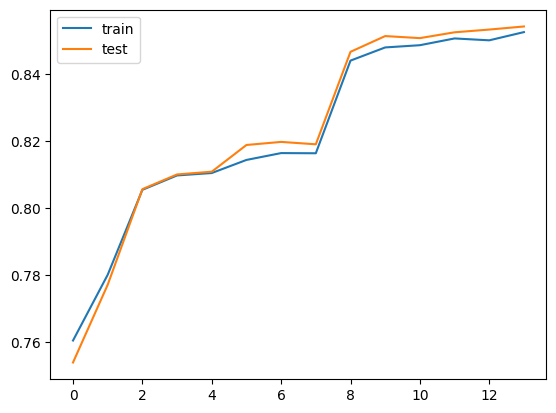

In [ ]:
plt.plot(train_accuracy, label='train')
plt.plot(test_accuracy, label='test')
plt.legend()

In [ ]:
from sklearn.linear_model import LogisticRegression

column_transformer = skc.ColumnTransformer(
    [('minmax', skp.MinMaxScaler(), NUMERICAL),
     ('cat', skp.OneHotEncoder(), CATEGORICAL)],
    remainder='drop',
    verbose_feature_names_out=False
)

transformed_data = column_transformer.fit_transform(train)
print(transformed_data.shape)

test_transformed_data = column_transformer.transform(test)
print(test_transformed_data.shape)
model = LogisticRegression(C= 100).fit(transformed_data, train.label.values)

(39074, 107)
(9768, 107)


[[0.57260712 0.42739288]
 [0.99647758 0.00352242]
 [0.98074569 0.01925431]
 ...
 [0.96444187 0.03555813]
 [0.99553636 0.00446364]
 [0.00498352 0.99501648]]


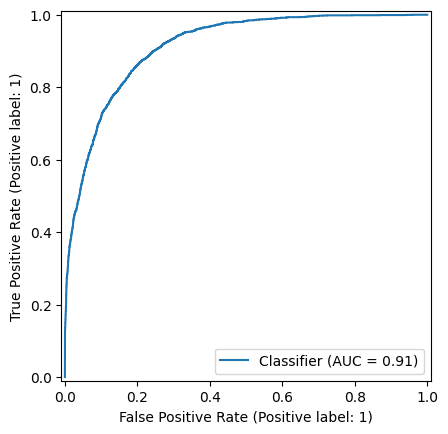

In [ ]:
print(model.predict_proba(test_transformed_data))
skm.accuracy_score(test.label.values, model.predict(test_transformed_data))
skm.RocCurveDisplay.from_predictions(test.label.values, model.predict_proba(test_transformed_data)[:,1])

In [ ]:
skm.roc_auc_score(data['label'], model.predict(data))
skm.accuracy_score(data['label'], model.predict(data) > 0.5)

0.7607182343065395